Data Preprocessing Analysis for Credit Card Approval Project

In [ ]:
# let's start by loading the dataset 
import pandas, numpy
import seaborn as sns
import encoders

merged_dataset = pandas.read_csv("../../data/labeled_data/labeled_data.csv")


: 

Outliers Detection

<Axes: xlabel='annual_income'>

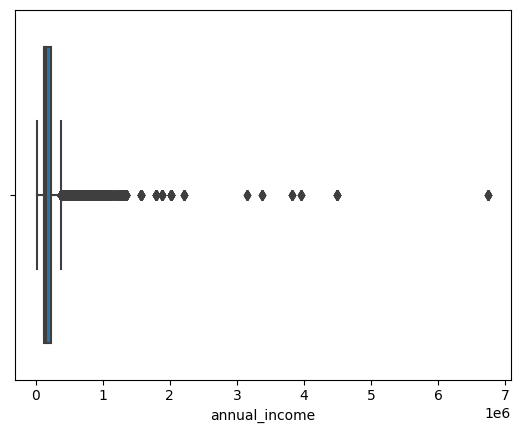

In [ ]:
sns.boxplot(x=merged_dataset['annual_income'])

In [ ]:
def remove_outliers_using_iqr(dataset: pandas.DataFrame, feature_name: str):
    """
    Function removes outliers using IQR Method
    """
    low, high = numpy.percentile(dataset[feature_name], [25, 75])
    iqr = (high - low)
    low_fence, high_fence = low - (1.5 * iqr), high + (1.5 * iqr)

    return dataset.loc[
    (dataset[feature_name] < high_fence) & (dataset[feature_name] > low_fence)
    ]


Dropping outliers

In [ ]:
merged_dataset = remove_outliers_using_iqr(merged_dataset, 'annual_income')

In [ ]:
merged_dataset = remove_outliers_using_iqr(merged_dataset, 'working_years')

Dataset Splitting (training, testing)

In [ ]:
from sklearn.model_selection import train_test_split 

X_labeled = merged_dataset.drop(columns=['bad_client'], inplace=False)
Y_labeled = merged_dataset['bad_client']

# splitting into training and testing set
x_train, x_test, y_train, y_test = train_test_split(
    X_labeled, Y_labeled, stratify=Y_labeled, test_size=0.3, random_state=42
)

# splitting into validation and testing sets
x_train, x_validation, y_train, y_validation = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# splitting into testing and calibration sets 
x_test, x_calibration, y_test, y_calibration = train_test_split(
    x_test, y_test, random_state=42, test_size=0.3
)

training_set = pandas.concat([x_train, y_train], axis=1)
testing_set = pandas.concat([x_test, y_test], axis=1)
validation_set = pandas.concat([x_validation, y_validation], axis=1)
calibration_set = pandas.concat([x_calibration, y_calibration], axis=1)


print(len(training_set), len(testing_set), len(validation_set), len(calibration_set))

20091 8611


Feature Encoding

In [ ]:
training_set = encoders.encode_dataset(training_set)
testing_set = encoders.encode_dataset(testing_set)
validation_set = encoders.encode_dataset(validation_set)
calibration_set = encoders.encode_dataset(calibration_set)

Removing Redundant and Unncessesary Features, based on Correlation Matrix output
Features, that has score under 0.4 would be removed

In [ ]:

for dataset in [
    training_set, testing_set
]:
    dataset.drop(
        columns=[
            
            'birthday', 
            'days_employed', 
            'total_children',
            
            'has_realty',
            'has_car',
            'family_status',
            'gender',
            "client_id",
            "job",
            
            'has_work_phone',
            'has_phone_number',
            'has_mobile_phone',
            'has_email',
            
            'total_overdues',
            'avg_overdue_change',
            'severe_score',
            'overdue_ratio'
            
        ], inplace=True
    )


Assigning datatypes to the dataset features

In [ ]:
def set_datatypes(df):
    # Numeric Data
    df['annual_income'] = df['annual_income'].astype(numpy.int64)
    df['age'] = df['age'].astype(numpy.int8)
    df['working_years'] = df['working_years'].astype(numpy.int8)

    # Categorical Data
    df['living_place'] = df['living_place'].astype(numpy.int8)

set_datatypes(training_set)
set_datatypes(testing_set)


: 

In [ ]:
training_set.isna().sum()

annual_income              0
education_category         0
living_place               0
family_size                0
age                        0
working_years              0
emp_stability              0
has_children               0
owns_realty_and_car        0
has_contact_information    0
credit_window              0
bad_client                 0
dtype: int64

Checking balance

<Axes: xlabel='bad_client', ylabel='count'>

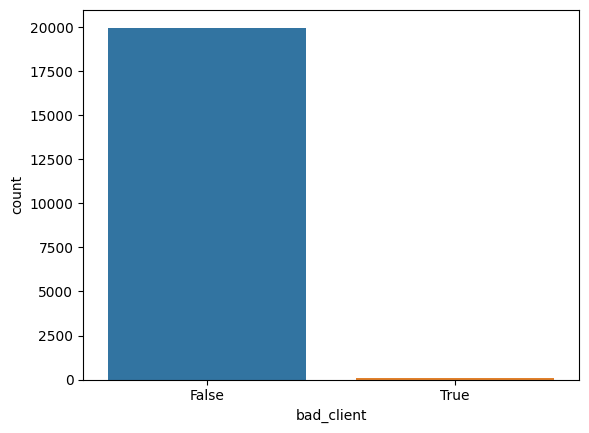

In [ ]:
sns.countplot(data=training_set, x='bad_client')

Checking correlation between features on training set using Correlation Matrix

<Axes: >

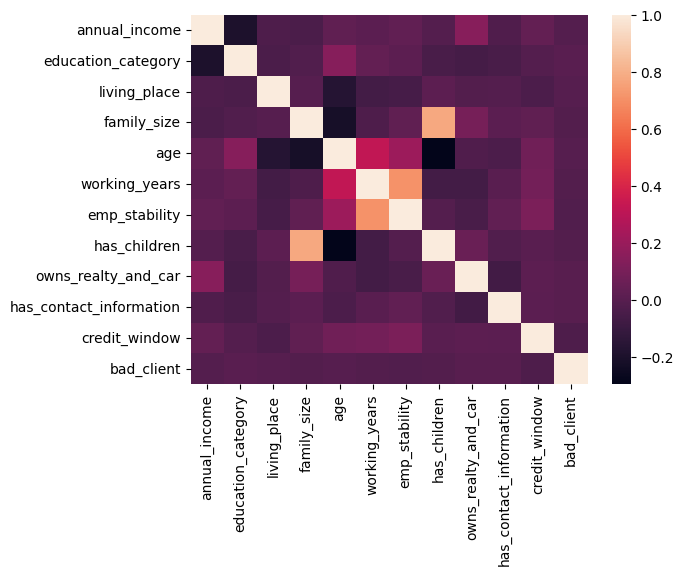

In [ ]:
sns.heatmap(training_set.corr())

Checking feature correlation on testing set using Correlation Matrix

<Axes: >

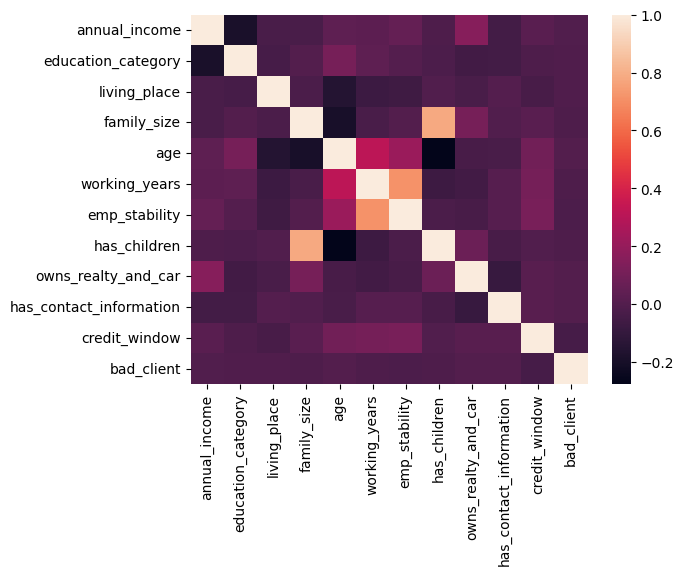

In [ ]:
sns.heatmap(testing_set.corr())

In [ ]:
training_set.columns

: 

Saving new datasets to a CSV Files

In [ ]:
training_set.to_csv("../processed_data/training_set.csv")
testing_set.to_csv('../processed_data/testing_set.csv')
validation_set.to_csv("../processed_data/validation_set.csv")
calibration_set.to_csv("../processed_data/calibration_set.csv")